In [1241]:
import requests
url = 'https://apitempo.inmet.gov.br/estacao/2022-04-01/2022-07-8/A201'
resultado = requests.get(url)

In [1242]:
import json
dados_org = resultado.json()
dados_str = json.dumps(dados_org)


In [1243]:
import pandas as pd
import numpy as np

In [1244]:
dados_tabla = pd.read_json(dados_str)
dados_tabla

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,BELÉM,1009.6,28.6,-1.411228,1009.6,PA,-1.2,24.2,25.2,-48.439512,...,0.0,24.1,25.3,13.0,0.0,27.0,25.2,94.0,A201,0
1,BELÉM,1010.4,28.6,-1.411228,1010.4,PA,-1.8,24.3,25.0,-48.439512,...,0.0,24.1,25.2,13.0,0.0,27.0,25.1,95.0,A201,100
2,BELÉM,1010.6,28.6,-1.411228,1010.6,PA,-1.4,24.0,25.1,-48.439512,...,0.0,24.0,25.3,13.0,0.0,27.0,25.3,92.0,A201,200
3,BELÉM,1010.4,28.6,-1.411228,1010.6,PA,-1.5,24.2,25.2,-48.439512,...,0.0,24.0,25.4,13.0,0.0,27.0,25.2,94.0,A201,300
4,BELÉM,1009.8,28.6,-1.411228,1010.4,PA,-1.6,24.4,25.0,-48.439512,...,0.0,24.2,25.2,13.0,0.0,26.0,25.0,96.0,A201,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,BELÉM,1010.1,30.0,-1.411228,1010.1,PA,1051.2,23.2,29.3,-48.439512,...,2.5,22.9,31.4,14.5,7.1,34.0,29.4,69.0,A201,1900
2372,BELÉM,1010.1,29.4,-1.411228,1010.2,PA,535.5,22.8,27.7,-48.439512,...,1.4,22.5,30.3,13.4,6.8,32.0,27.7,75.0,A201,2000
2373,BELÉM,1010.6,30.0,-1.411228,1010.6,PA,100.7,23.4,27.4,-48.439512,...,0.2,22.8,27.8,13.0,3.6,30.0,27.4,79.0,A201,2100
2374,BELÉM,1011.0,29.4,-1.411228,1011.0,PA,7.2,23.5,26.7,-48.439512,...,0.6,23.4,27.5,13.0,3.7,29.0,26.7,83.0,A201,2200


In [1245]:
dados = dados_tabla[['DT_MEDICAO', 'HR_MEDICAO', 'TEM_INS', 'UMD_INS', 'RAD_GLO']]
dados

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2022-04-01,0,25.2,94.0,-1.2
1,2022-04-01,100,25.1,95.0,-1.8
2,2022-04-01,200,25.3,92.0,-1.4
3,2022-04-01,300,25.2,94.0,-1.5
4,2022-04-01,400,25.0,96.0,-1.6
...,...,...,...,...,...
2371,2022-07-08,1900,29.4,69.0,1051.2
2372,2022-07-08,2000,27.7,75.0,535.5
2373,2022-07-08,2100,27.4,79.0,100.7
2374,2022-07-08,2200,26.7,83.0,7.2


# Renomia o titulo do nosso dados

In [1246]:
dados.columns = ['DATA','HORARIO', 'TEMPERATURA', 'UMIDADE', 'RADIACAO']

In [1247]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2022-04-01,0,25.2,94.0,-1.2
1,2022-04-01,100,25.1,95.0,-1.8
2,2022-04-01,200,25.3,92.0,-1.4
3,2022-04-01,300,25.2,94.0,-1.5
4,2022-04-01,400,25.0,96.0,-1.6
...,...,...,...,...,...
2371,2022-07-08,1900,29.4,69.0,1051.2
2372,2022-07-08,2000,27.7,75.0,535.5
2373,2022-07-08,2100,27.4,79.0,100.7
2374,2022-07-08,2200,26.7,83.0,7.2


<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='HORARIO'>

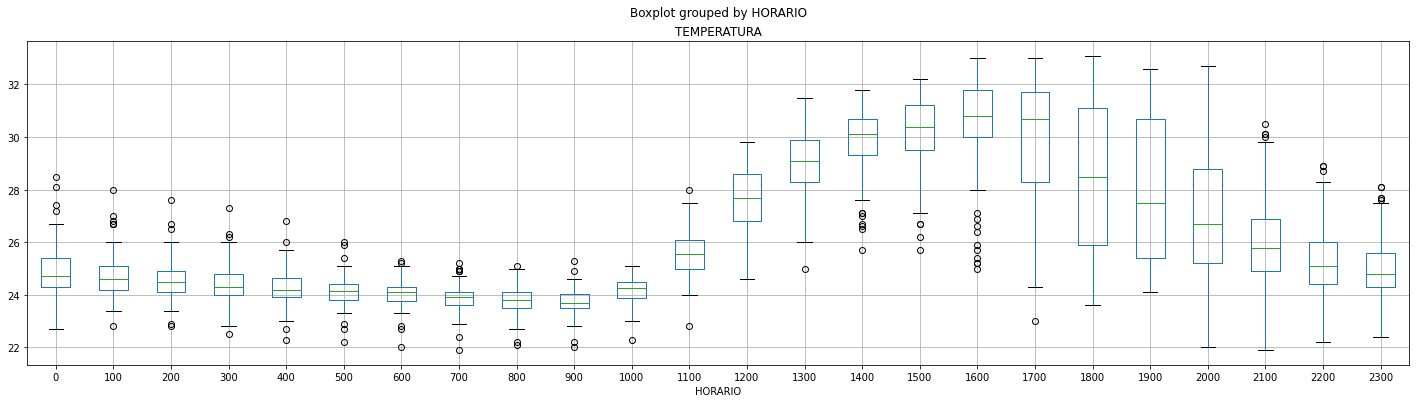

In [1248]:
dados.boxplot("TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'UMIDADE'}, xlabel='HORARIO'>

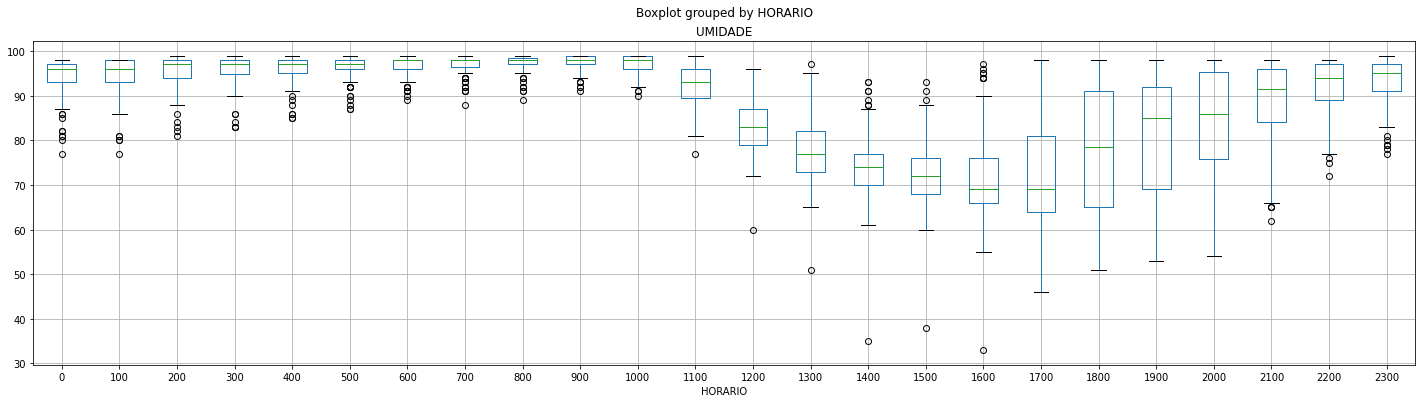

In [1249]:
dados.boxplot("UMIDADE", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'RADIACAO'}, xlabel='HORARIO'>

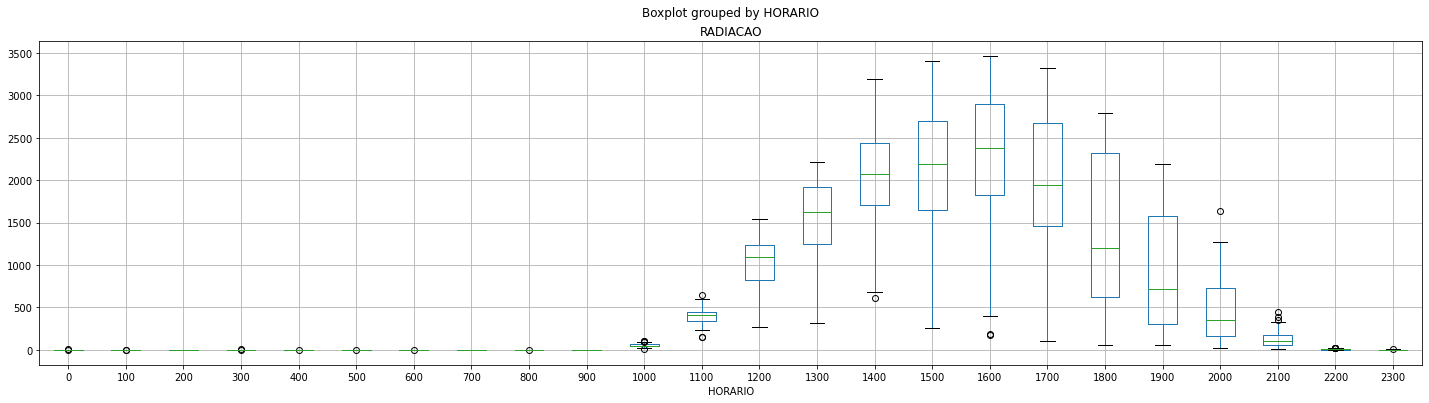

In [1250]:
dados.boxplot("RADIACAO", by='HORARIO', figsize=(24,6))

# Verificando a suma de dados null 

In [1251]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.000000
HORARIO        0.000000
TEMPERATURA    0.105219
UMIDADE        0.112374
RADIACAO       0.105219
dtype: float64

In [1252]:
dados[pd.isnull(dados['TEMPERATURA'])]

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
1684,2022-06-10,400,NaN,NaN,NaN
1685,2022-06-10,500,NaN,NaN,NaN
1686,2022-06-10,600,NaN,NaN,NaN
1687,2022-06-10,700,NaN,NaN,NaN
1688,2022-06-10,800,NaN,NaN,NaN
...,...,...,...,...,...
1929,2022-06-20,900,NaN,NaN,NaN
1930,2022-06-20,1000,NaN,NaN,NaN
2070,2022-06-26,600,NaN,NaN,NaN
2075,2022-06-26,1100,NaN,NaN,NaN


In [1253]:
dados = dados.fillna(method='ffill')

In [1254]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.0
HORARIO        0.0
TEMPERATURA    0.0
UMIDADE        0.0
RADIACAO       0.0
dtype: float64

# verificando se nosso dados são numéricos

In [1255]:
dados.dtypes

DATA            object
HORARIO          int64
TEMPERATURA    float64
UMIDADE        float64
RADIACAO       float64
dtype: object

<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='DATA'>

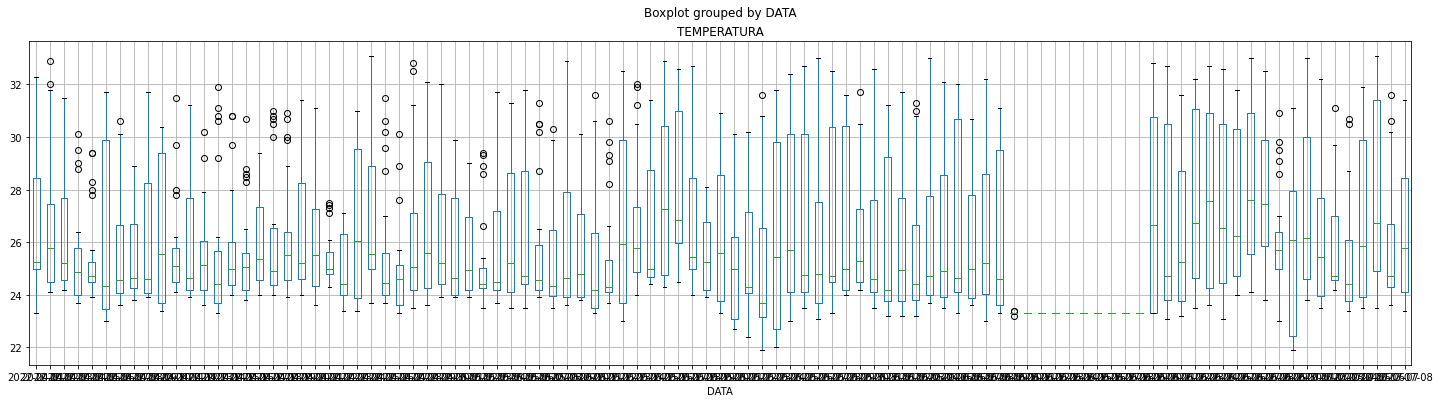

In [1256]:
dados.boxplot("TEMPERATURA", by='DATA', figsize=(24,6))

<AxesSubplot:>

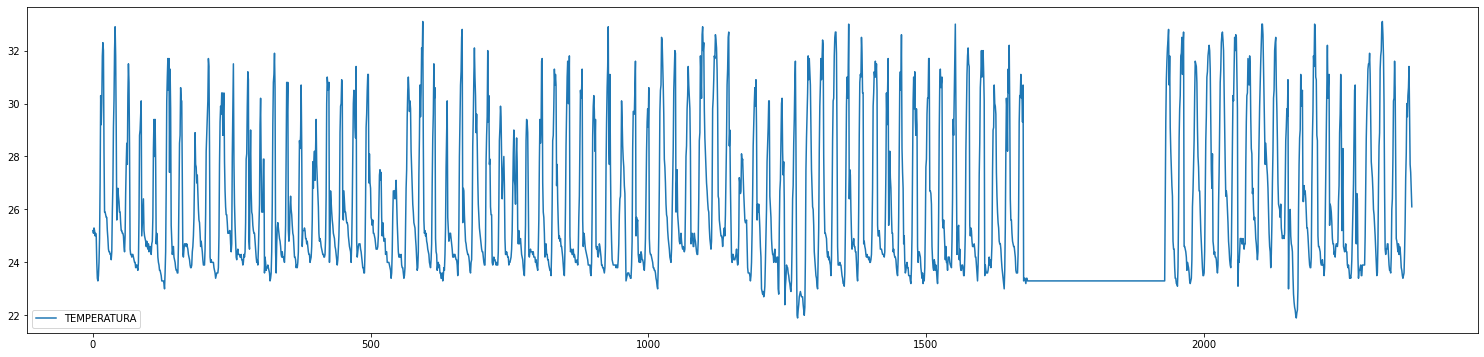

In [1257]:
dados[['TEMPERATURA']].plot(figsize=(26,6))

# Agrupando os dados por horário

In [1258]:
dados.groupby(dados.HORARIO).sum()

,TEMPERATURA,UMIDADE,RADIACAO
HORARIO,,,
0,2448.1,9313.0,-68.7
100,2435.1,9360.0,-90.5
200,2419.7,9414.0,-131.4
300,2408.3,9450.0,-134.2
400,2395.0,9489.0,-146.0
500,2381.7,9519.0,-165.4
600,2372.0,9556.0,-173.4
700,2360.4,9585.0,-175.6
800,2350.7,9605.0,-178.0


### Criando novos colunas para Temperatura da amahão, Umidade da amahão e Radiação da amahão na tabla  

In [1259]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2022-04-01,0,25.2,94.0,-1.2
1,2022-04-01,100,25.1,95.0,-1.8
2,2022-04-01,200,25.3,92.0,-1.4
3,2022-04-01,300,25.2,94.0,-1.5
4,2022-04-01,400,25.0,96.0,-1.6
...,...,...,...,...,...
2371,2022-07-08,1900,29.4,69.0,1051.2
2372,2022-07-08,2000,27.7,75.0,535.5
2373,2022-07-08,2100,27.4,79.0,100.7
2374,2022-07-08,2200,26.7,83.0,7.2


### Criando novos colunas para Temperatura da amahão, Umidade da amahão e Radiação da amahão na tabla 

In [1260]:
dados['TEMP_AMANHAO'] = dados.shift(-1)['TEMPERATURA']
dados['TEMP_MES_MIX'] = dados['TEMPERATURA'].rolling(30).mean()

In [1261]:
dados['UMID_AMANHAO'] = dados.shift(-1)['UMIDADE']
dados['UMID_MES_MIX'] = dados['UMIDADE'].rolling(30).mean()

In [1262]:
dados['RADI_AMANHAO'] = dados.shift(-1)['RADIACAO']
dados['RADI_MES_MIX'] = dados['RADIACAO'].rolling(30).mean()

In [1263]:
dados['HORARIO_ATUAL'] = dados.shift(3)['HORARIO']

### Deletando NULL

In [1264]:
dados = dados.iloc[30:,:].copy()
dados = dados.iloc[:-1, :].copy()

In [1265]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.01, solver='auto', fit_intercept=True, max_iter=None, tol=0.001, copy_X=True)

In [1266]:
from sklearn.metrics import mean_absolute_percentage_error

In [1267]:
numerio_de_dados = (len(dados)+8)/2

In [1268]:
def criar_previsões_temp(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["TEMP_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["TEMP_AMANHAO"],preditores)
    conjunto = pd.concat([teste['TEMP_AMANHAO'], pd.Series(preditores, index=teste.index )], axis=1)
    conjunto.columns = ['ATUAL_TEMPERATURA', 'PREVISOES_TEMPERATURA']
    conjunto[['DATA','HORARIO']] = teste[['DATA','HORARIO_ATUAL']]
    return erro, conjunto

In [1269]:
def criar_previsões_umid(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["UMID_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["UMID_AMANHAO"],preditores)
    conjunto = pd.concat([teste["UMID_AMANHAO"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]
    return erro, conjunto

In [1270]:
def criar_previsões_radi(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["RADI_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["RADI_AMANHAO"],preditores)
    conjunto = pd.concat([teste["RADI_AMANHAO"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]
    return erro, conjunto

In [1271]:
preditores = ['HORARIO', 'TEMPERATURA','UMIDADE', 'RADIACAO','TEMP_MES_MIX', 'UMID_MES_MIX','RADI_MES_MIX']

In [1272]:
temp_erro, temp_prevesao = criar_previsões_temp(preditores, dados, reg)

In [1273]:
umid_erro, umid_prevesao = criar_previsões_umid(preditores, dados, reg)

In [1274]:
radi_erro, radi_prevesao = criar_previsões_radi(preditores, dados, reg)

In [1275]:
previsoes_dados = temp_prevesao

In [1276]:
previsoes_dados[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]] = umid_prevesao[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]]

In [1277]:
previsoes_dados

,ATUAL_TEMPERATURA,PREVISOES_TEMPERATURA,DATA,HORARIO,ATUAL_UMIDADE,PREVISOES_UMIDADE
1177,24.6,25.994933,2022-05-20,2200.0,94.0,86.714815
1178,23.8,25.205142,2022-05-20,2300.0,97.0,90.072712
1179,23.6,24.555795,2022-05-20,0.0,98.0,92.713464
1180,23.6,24.383261,2022-05-20,100.0,98.0,93.708582
1181,23.6,24.365537,2022-05-20,200.0,98.0,93.903245
...,...,...,...,...,...,...
2370,29.4,30.611225,2022-07-08,1500.0,69.0,70.119893
2371,27.7,28.382445,2022-07-08,1600.0,75.0,74.327507
2372,27.4,26.887156,2022-07-08,1700.0,79.0,79.771329
2373,26.7,26.645762,2022-07-08,1800.0,83.0,82.874934


In [1278]:
previsoes_dados[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]] = radi_prevesao[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]]

In [1279]:
previsoes_dados = previsoes_dados[['DATA','HORARIO','ATUAL_TEMPERATURA','PREVISOES_TEMPERATURA','ATUAL_UMIDADE','PREVISOES_UMIDADE','ATUAL_RADIACAO','PREVISOES_RADIACAO']]

In [1280]:
garoadb = previsoes_dados[['DATA','HORARIO','PREVISOES_TEMPERATURA','PREVISOES_UMIDADE','PREVISOES_RADIACAO']]

In [1281]:
garoadb

,DATA,HORARIO,PREVISOES_TEMPERATURA,PREVISOES_UMIDADE,PREVISOES_RADIACAO
1177,2022-05-20,2200.0,25.994933,86.714815,463.303378
1178,2022-05-20,2300.0,25.205142,90.072712,366.632921
1179,2022-05-20,0.0,24.555795,92.713464,281.176179
1180,2022-05-20,100.0,24.383261,93.708582,251.429337
1181,2022-05-20,200.0,24.365537,93.903245,237.637800
...,...,...,...,...,...
2370,2022-07-08,1500.0,30.611225,70.119893,2041.750705
2371,2022-07-08,1600.0,28.382445,74.327507,882.888219
2372,2022-07-08,1700.0,26.887156,79.771329,405.052631
2373,2022-07-08,1800.0,26.645762,82.874934,170.207054


In [1282]:
h0 = garoadb[garoadb['HORARIO'] == 0.0]
T0 = h0['PREVISOES_TEMPERATURA'].median()
U0 = h0['PREVISOES_UMIDADE'].median()
R0 = h0['PREVISOES_RADIACAO'].median()

h1 = garoadb[garoadb['HORARIO'] == 100.0]
T1 = h1['PREVISOES_TEMPERATURA'].median()
U1 = h1['PREVISOES_UMIDADE'].median()
R1 = h1['PREVISOES_RADIACAO'].median()

h2 = garoadb[garoadb['HORARIO'] == 200.0]
T2 = h2['PREVISOES_TEMPERATURA'].median()
U2 = h2['PREVISOES_UMIDADE'].median()
R2 = h2['PREVISOES_RADIACAO'].median()

h3 = garoadb[garoadb['HORARIO'] == 300.0]
T3 = h3['PREVISOES_TEMPERATURA'].median()
U3 = h3['PREVISOES_UMIDADE'].median()
R3 = h3['PREVISOES_RADIACAO'].median()

h4 = garoadb[garoadb['HORARIO'] == 400.0]
T4 = h4['PREVISOES_TEMPERATURA'].median()
U4 = h4['PREVISOES_UMIDADE'].median()
R4 = h4['PREVISOES_RADIACAO'].median()

h5 = garoadb[garoadb['HORARIO'] == 500.0]
T5 = h5['PREVISOES_TEMPERATURA'].median()
U5 = h5['PREVISOES_UMIDADE'].median()
R5 = h5['PREVISOES_RADIACAO'].median()

h6 = garoadb[garoadb['HORARIO'] == 600.0]
T6 = h6['PREVISOES_TEMPERATURA'].median()
U6 = h6['PREVISOES_UMIDADE'].median()
R6 = h6['PREVISOES_RADIACAO'].median()

h7 = garoadb[garoadb['HORARIO'] == 700.0]
T7 = h7['PREVISOES_TEMPERATURA'].median()
U7 = h7['PREVISOES_UMIDADE'].median()
R7 = h7['PREVISOES_RADIACAO'].median()

h8 = garoadb[garoadb['HORARIO'] == 800.0]
T8 = h8['PREVISOES_TEMPERATURA'].median()
U8 = h8['PREVISOES_UMIDADE'].median()
R8 = h8['PREVISOES_RADIACAO'].median()

h9 = garoadb[garoadb['HORARIO'] == 900.0]
T9 = h9['PREVISOES_TEMPERATURA'].median()
U9 = h9['PREVISOES_UMIDADE'].median()
R9 = h9['PREVISOES_RADIACAO'].median()

h10 = garoadb[garoadb['HORARIO'] == 1000.0]
T10 = h10['PREVISOES_TEMPERATURA'].median()
U10 = h10['PREVISOES_UMIDADE'].median()
R10 = h10['PREVISOES_RADIACAO'].median()

h11 = garoadb[garoadb['HORARIO'] == 1100.0]
T11 = h11['PREVISOES_TEMPERATURA'].median()
U11 = h11['PREVISOES_UMIDADE'].median()
R11 = h11['PREVISOES_RADIACAO'].median()

h12 = garoadb[garoadb['HORARIO'] == 1200.0]
T12 = h12['PREVISOES_TEMPERATURA'].median()
U12 = h12['PREVISOES_UMIDADE'].median()
R12 = h12['PREVISOES_RADIACAO'].median()

h13 = garoadb[garoadb['HORARIO'] == 1300.0]
T13 = h13['PREVISOES_TEMPERATURA'].median()
U13 = h13['PREVISOES_UMIDADE'].median()
R13 = h13['PREVISOES_RADIACAO'].median()

h14 = garoadb[garoadb['HORARIO'] == 1400.0]
T14 = h14['PREVISOES_TEMPERATURA'].median()
U14 = h14['PREVISOES_UMIDADE'].median()
R14 = h14['PREVISOES_RADIACAO'].median()

h15 = garoadb[garoadb['HORARIO'] == 1500.0]
T15 = h15['PREVISOES_TEMPERATURA'].median()
U15 = h15['PREVISOES_UMIDADE'].median()
R15 = h15['PREVISOES_RADIACAO'].median()

h16 = garoadb[garoadb['HORARIO'] == 1600.0]
T16 = h16['PREVISOES_TEMPERATURA'].median()
U16 = h16['PREVISOES_UMIDADE'].median()
R16 = h16['PREVISOES_RADIACAO'].median()

h17 = garoadb[garoadb['HORARIO'] == 1700.0]
T17 = h17['PREVISOES_TEMPERATURA'].median()
U17 = h17['PREVISOES_UMIDADE'].median()
R17 = h17['PREVISOES_RADIACAO'].median()

h18 = garoadb[garoadb['HORARIO'] == 1800.0]
T18 = h18['PREVISOES_TEMPERATURA'].median()
U18 = h18['PREVISOES_UMIDADE'].median()
R18 = h18['PREVISOES_RADIACAO'].median()

h19 = garoadb[garoadb['HORARIO'] == 1900.0]
T19 = h19['PREVISOES_TEMPERATURA'].median()
U19 = h19['PREVISOES_UMIDADE'].median()
R19 = h19['PREVISOES_RADIACAO'].median()

h20 = garoadb[garoadb['HORARIO'] == 2000.0]
T20 = h20['PREVISOES_TEMPERATURA'].median()
U20 = h20['PREVISOES_UMIDADE'].median()
R20 = h20['PREVISOES_RADIACAO'].median()

h21 = garoadb[garoadb['HORARIO'] == 2100.0]
T21 = h21['PREVISOES_TEMPERATURA'].median()
U21 = h21['PREVISOES_UMIDADE'].median()
R21 = h21['PREVISOES_RADIACAO'].median()

h22 = garoadb[garoadb['HORARIO'] == 2200.0]
T22 = h22['PREVISOES_TEMPERATURA'].median()
U22 = h22['PREVISOES_UMIDADE'].median()
R22 = h22['PREVISOES_RADIACAO'].median()

h23 = garoadb[garoadb['HORARIO'] == 2300.0]
T23 = h23['PREVISOES_TEMPERATURA'].median()
U23 = h23['PREVISOES_UMIDADE'].median()
R23 = h23['PREVISOES_RADIACAO'].median()

garoadb2 = pd.DataFrame([(T0,U0,R0),
                         (T1,U1,R1),
                         (T2,U2,R2),
                         (T3,U3,R3),
                         (T4,U4,R4),
                         (T5,U5,R5),
                         (T6, U6, R6),
                        (T7, U7, R7),
                        (T8, U8, R8),
                        (T9, U9, R9),
                        (T10, U10, R10),
                        (T11, U11, R11),
                        (T12, U12, R12),
                        (T13, U13, R13),
                        (T14, U14, R14),
                        (T15, U15, R15),
                        (T16, U16, R16),
                        (T17, U17, R17),
                        (T18, U18, R18),
                        (T19, U19, R19),
                        (T20, U20, R20),
                        (T21, U21, R21),
                        (T22, U22, R22),
                        (T23, U23, R23)
                                        ])
                         


In [1283]:
garoadb2.columns = ['TEM_INS','UMD_INS','RAD_GLO']

In [1284]:
garoadb2['HR_MEDICAO'] = pd.DataFrame([(0),
 (100),(200),(300),(400),(500),(600),(700),(800),(900),(1000),(1100),(1200),(1300),(1400),(1500),(1600),(1700),(1800),(1900),(2000),(2100),(2200),(2300)])

In [1285]:
garoadb2['DT_MEDICAO']= pd.DataFrame([('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09'),
('2022-07-09')])

In [1286]:
garoadb2

,TEM_INS,UMD_INS,RAD_GLO,HR_MEDICAO,DT_MEDICAO
0,24.294838,94.689834,47.861182,0,2022-07-09
1,24.297031,94.671666,16.715742,100,2022-07-09
2,24.261974,95.012672,-0.224197,200,2022-07-09
3,24.241616,95.068814,-10.504100,300,2022-07-09
4,24.110661,95.924129,-29.658711,400,2022-07-09
5,23.994951,95.726469,-49.218564,500,2022-07-09
6,23.870808,96.039309,-46.957549,600,2022-07-09
7,24.304643,95.621632,40.285448,700,2022-07-09
8,25.279631,93.424173,354.031223,800,2022-07-09
9,27.102312,84.069301,961.749246,900,2022-07-09


In [1287]:
garoadb2.DT_MEDICAO = pd.to_datetime(garoadb2.DT_MEDICAO)

In [1288]:
garoadb3 = garoadb2[['DT_MEDICAO','HR_MEDICAO','TEM_INS','UMD_INS','RAD_GLO']]

In [1289]:
garoadb3

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2022-07-09,0,24.294838,94.689834,47.861182
1,2022-07-09,100,24.297031,94.671666,16.715742
2,2022-07-09,200,24.261974,95.012672,-0.224197
3,2022-07-09,300,24.241616,95.068814,-10.504100
4,2022-07-09,400,24.110661,95.924129,-29.658711
5,2022-07-09,500,23.994951,95.726469,-49.218564
6,2022-07-09,600,23.870808,96.039309,-46.957549
7,2022-07-09,700,24.304643,95.621632,40.285448
8,2022-07-09,800,25.279631,93.424173,354.031223
9,2022-07-09,900,27.102312,84.069301,961.749246


In [1290]:
garoadb3.to_csv('garoaDB.csv', index=False)

<AxesSubplot:title={'center':'TEM_INS'}, xlabel='HR_MEDICAO'>

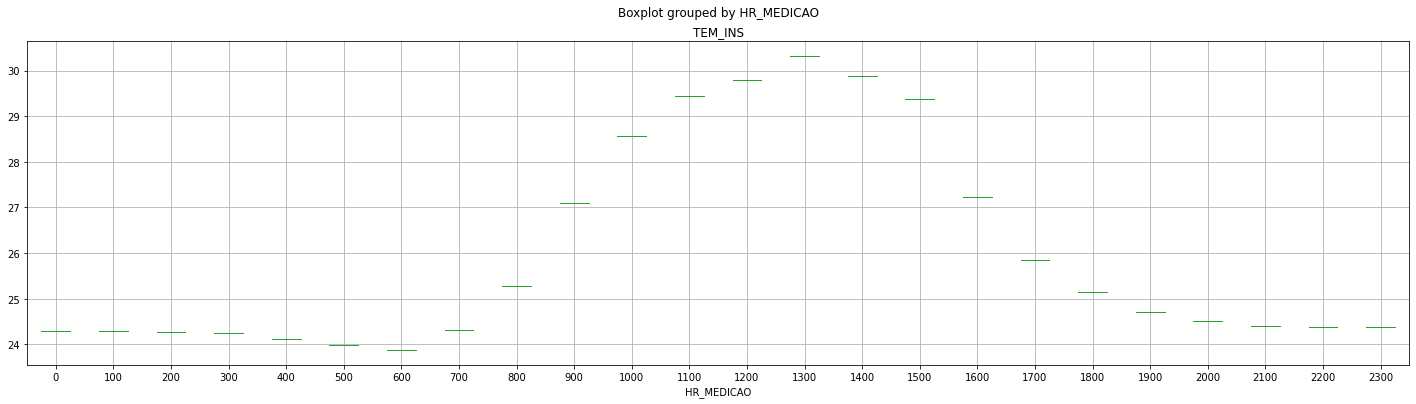

In [1291]:
garoadb2.boxplot("TEM_INS", by='HR_MEDICAO', figsize=(24,6))

<AxesSubplot:title={'center':'UMD_INS'}, xlabel='HR_MEDICAO'>

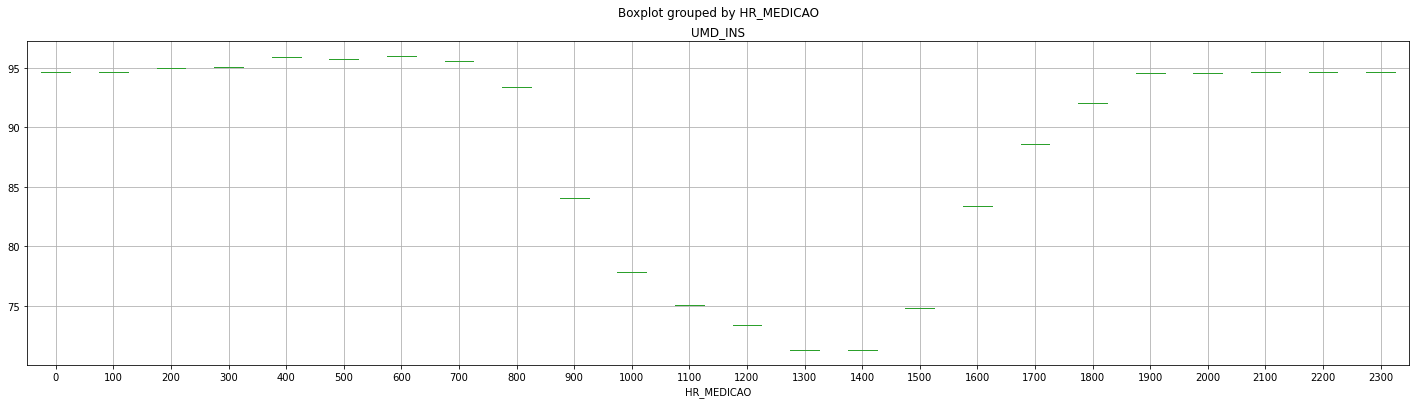

In [1292]:
garoadb2.boxplot("UMD_INS", by='HR_MEDICAO', figsize=(24,6))


<AxesSubplot:title={'center':'RAD_GLO'}, xlabel='HR_MEDICAO'>

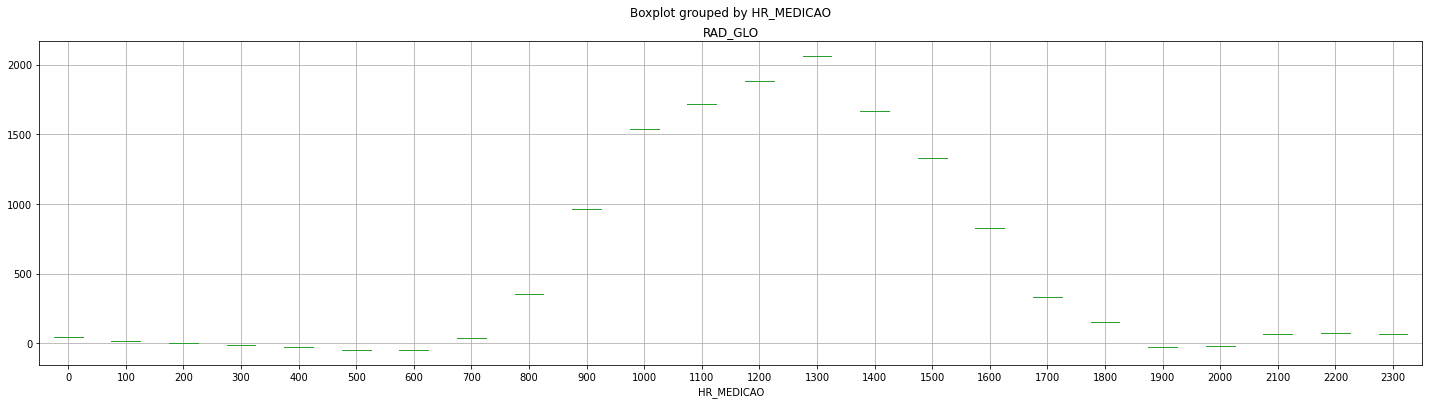

In [1293]:
garoadb2.boxplot("RAD_GLO", by='HR_MEDICAO', figsize=(24,6))


In [1294]:
umid_erro

0.04535055923378354

In [1295]:
temp_erro

0.033267590907965196

In [1296]:
radi_erro

1028958977924171.0

<AxesSubplot:title={'center':'PREVISOES_TEMPERATURA'}, xlabel='HORARIO'>

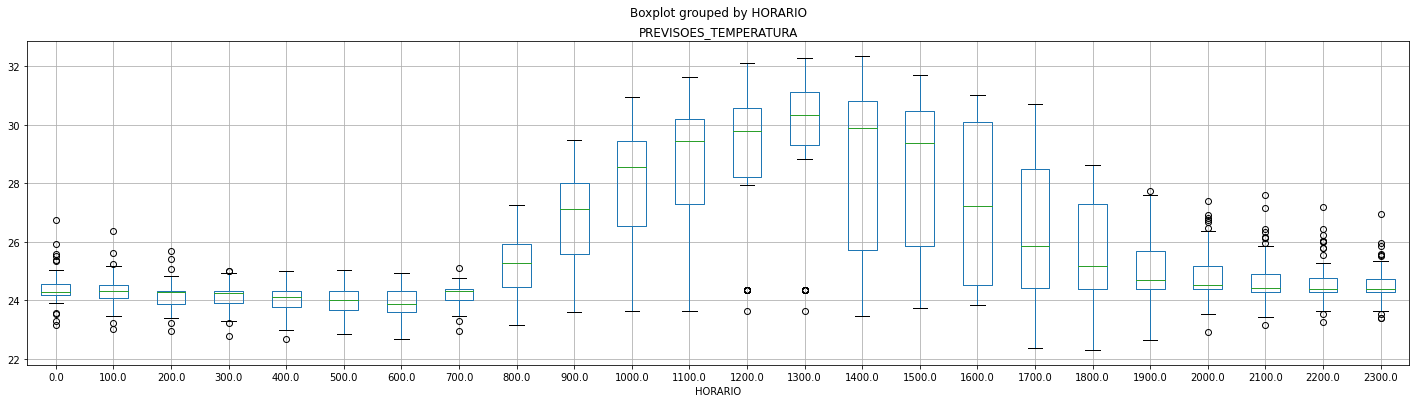

In [1297]:
previsoes_dados.boxplot("PREVISOES_TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'PREVISOES_UMIDADE'}, xlabel='HORARIO'>

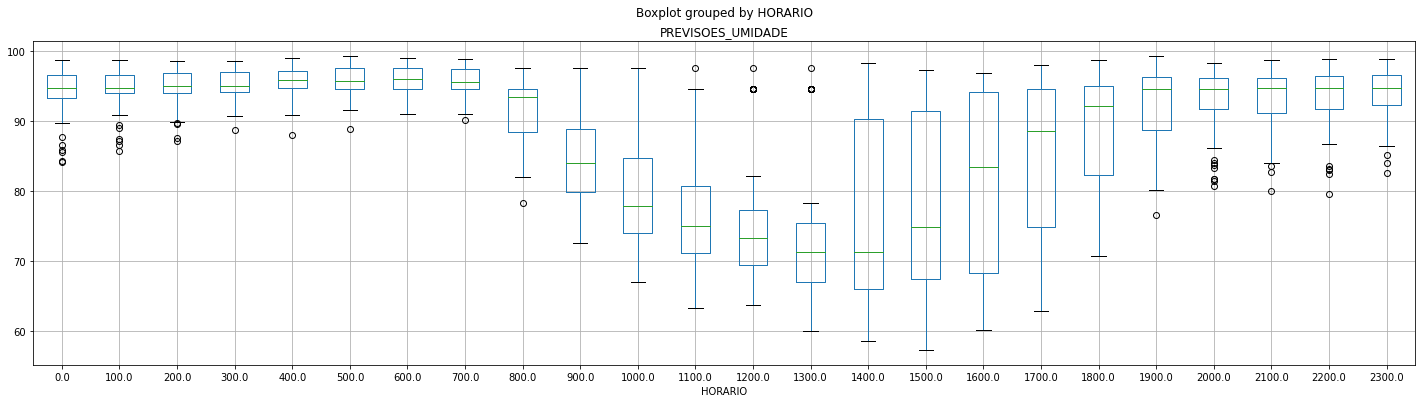

In [1298]:
previsoes_dados.boxplot("PREVISOES_UMIDADE", by='HORARIO', figsize=(24,6))


<AxesSubplot:title={'center':'PREVISOES_RADIACAO'}, xlabel='HORARIO'>

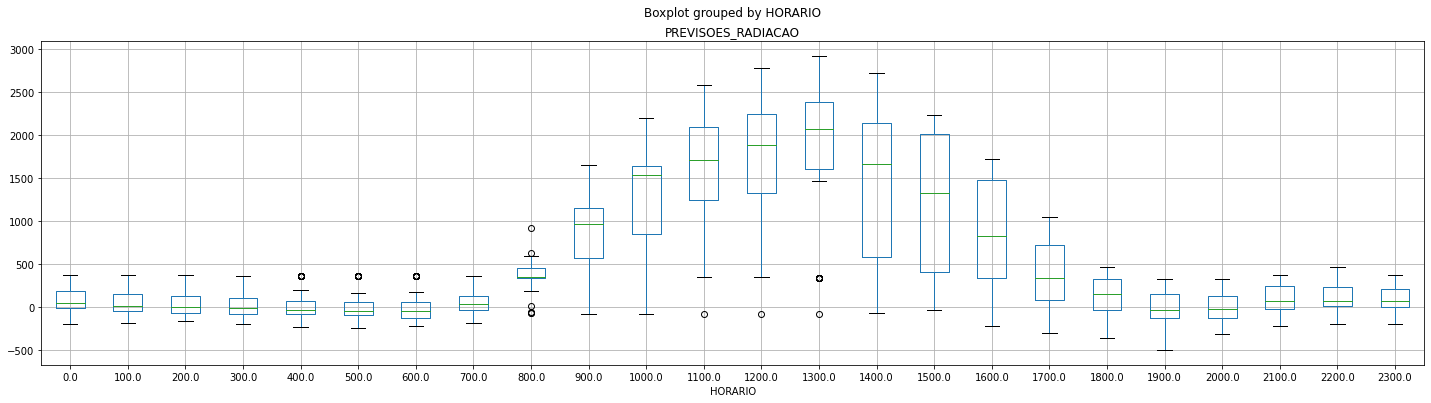

In [1299]:
previsoes_dados.boxplot("PREVISOES_RADIACAO", by='HORARIO', figsize=(24,6))